<a href="https://colab.research.google.com/github/madhukar123456/Machine-Learning-on-MNIST/blob/main/Deep_Learning_on_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question no 8. Deep Learning

In [ ]:
# Loading MNIST digits dataset
import tensorflow as tf
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [ ]:
# Splitting digits from 0 to 4 as per question

x_train = x_train[y_train<5]
y_train = y_train[y_train<5]
x_test = x_test[y_test<5]
y_test = y_test[y_test<5]

In [ ]:
x_train.shape

(30596, 28, 28)

In [ ]:
# Splitting dataset for validation set

X_valid, X_train = x_train[:5000]/255.0 , x_train[5000:]/255.0
y_valid, y_train = y_train[:5000], y_train[5000:]

In [ ]:
X_train.dtype

dtype('float64')

In [ ]:
X_train.shape

(25596, 28, 28)

In [ ]:
from collections import Counter # Counting number of targets

print(Counter(y_train).keys()) 
Counter(y_train).values()

dict_keys([0, 1, 2, 3, 4])


dict_values([4954, 5641, 4997, 5124, 4880])

In [ ]:
# Creating a model; elu activation with he initializer and dropout.
model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape=[28,28]),
                                 keras.layers.Dropout(rate=0.2),
                                 keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
                                 keras.layers.Dropout(rate=0.2),
                                 keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
                                 keras.layers.Dropout(rate=0.2),
                                 keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
                                 keras.layers.Dropout(rate=0.2),
                                 keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
                                 keras.layers.Dropout(rate=0.2),
                                 keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
                                 keras.layers.Dropout(rate=0.2),
                                 keras.layers.Dense(5, activation="softmax")
                      ])
optimizer = keras.optimizers.Adam(learning_rate=0.001)    
model.summary()                                                                                                                                                                                                                               

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 784)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_13 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_14 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 100)              

In [ ]:
# Compiling model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
# Creating checkpoints and early stopping callbacks

checkpoint_cb = keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/Practice/ch11model/my_keras_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=25, 
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/25
800/800 [==============================] - 3s 3ms/step - loss: 0.6402 - accuracy: 0.7782 - val_loss: 0.1388 - val_accuracy: 0.9592
Epoch 2/25
800/800 [==============================] - 2s 3ms/step - loss: 0.2114 - accuracy: 0.9347 - val_loss: 0.1170 - val_accuracy: 0.9652
Epoch 3/25
800/800 [==============================] - 2s 3ms/step - loss: 0.1811 - accuracy: 0.9459 - val_loss: 0.1056 - val_accuracy: 0.9684
Epoch 4/25
800/800 [==============================] - 2s 3ms/step - loss: 0.1670 - accuracy: 0.9490 - val_loss: 0.1062 - val_accuracy: 0.9704
Epoch 5/25
800/800 [==============================] - 2s 3ms/step - loss: 0.1571 - accuracy: 0.9537 - val_loss: 0.0988 - val_accuracy: 0.9706
Epoch 6/25
800/800 [==============================] - 2s 3ms/step - loss: 0.1369 - accuracy: 0.9591 - val_loss: 0.0893 - val_accuracy: 0.9728
Epoch 7/25
800/800 [==============================] - 2s 3ms/step - loss: 0.1378 - accuracy: 0.9585 - val_loss: 0.0901 - val_accuracy: 0.9726
Epoch 

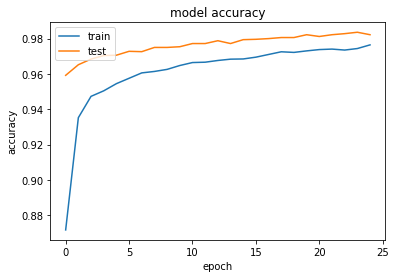

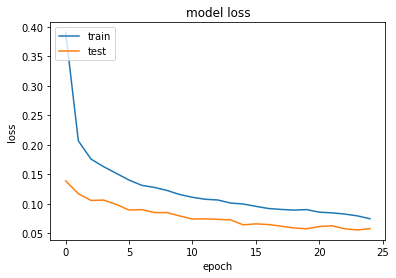

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=32)
print("test loss, test acc:", results)


Evaluate on test data
161/161 [==============================] - 0s 2ms/step - loss: 1.9487 - accuracy: 0.9716
test loss, test acc: [1.9486855268478394, 0.9715898036956787]
